# METHOD 
1. Copied and pasted the NIFTY's Straddle prices for different Dates and Expiry Dates from the website linked
2. Unnamed columns are the Index prices which we have ignored for predicting the straddle prices using time series.
3. Reason being the websites UI didn't allow to navigate to the right and the price at which the option is bought is not given   so the only information we could have gathered from the index prices would be the volatility of the stock
4. But since the graphs of premium straddle prices we plotted has an almost regular increasing trend for different expiry dates and since we have less data available we might get a good model for time series prediction using previous days price.
5. So the exact method would be - we will first predict the price of NIFTY on 12th March(i.e of dte=2) by using data from dte=3 to dte=8 on 14th March using SARIMA model.
6. We wanted to predict the price on the same day using the prices on dte=2 for different expiry dates. But the graph we got at different dte were non consistent(dte=6 graph has been plotted for reference here)
7. Hence we conclude the final straddle prices and then plot them accordingly for 12th March 2024

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\User\Downloads\yun.csv")
df

,Expiry,Date,Open,High,Low,Close,Intraday,Tonight,Index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,dte
0,14-03-2024,Thu:14/03,144.60,156.80,2.70,3.40,141.20,0.00,Open,High,Low,Close,Intraday,Gap,0
1,07-03-2024,Thu:07/03,118.00,118.00,4.65,6.55,111.45,0.00,21956,22201.9,21928.65,22144.95,273.25,0,0
2,29-02-2024,Thu:29/02,153.70,169.60,13.80,16.25,137.45,0.00,22498.05,22519.6,22439.2,22483.6,80.4,0,0
3,22-02-2024,Thu:22/02,124.65,150.55,13.95,17.90,106.75,0.00,21922.45,22055.7,21865.55,22050.7,190.15,0,0
4,15-02-2024,Thu:15/02,122.05,126.00,8.40,10.75,111.30,0.00,22051.1,22243.85,21881.7,22225.55,362.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,08-02-2024,Mon:29/01,493.45,538.00,493.45,523.30,-29.85,-3.40,21475.4,21759.6,21468.15,21751.05,291.45,-41.5,8
86,01-02-2024,Fri:19/01,485.70,490.00,457.85,467.55,18.15,27.25,21615.55,21668.05,21579.2,21636.1,88.85,75.75,8
87,25-01-2024,Mon:15/01,386.00,403.50,384.95,389.95,-3.95,8.90,22027.5,22110.7,21971.7,22105.8,139,43.6,8
88,18-01-2024,Mon:08/01,335.45,358.25,326.00,349.30,-13.85,36.95,21732.65,21763.4,21496.1,21508.85,267.3,-139.85,8


0    389.40
1    397.60
2    400.25
3    385.05
4    417.80
5    472.65
6    468.85
7    406.00
8    282.10
9    295.70
Name: Open, dtype: float64
30    Tue:05/03
31    Wed:28/02
32    Wed:21/02
33    Wed:14/02
34    Wed:07/02
75    Thu:01/02
76    Wed:24/01
77    Thu:18/01
78    Thu:11/01
79    Thu:04/01
Name: Date, dtype: object


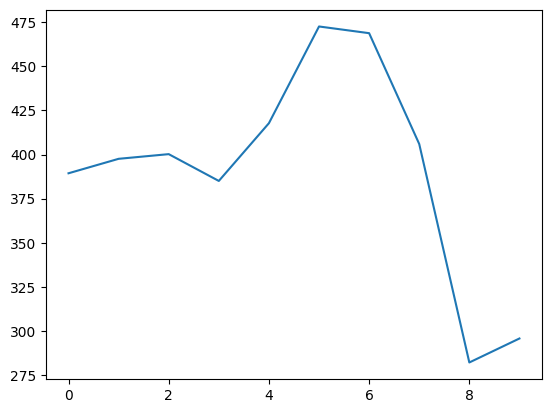

In [3]:
import matplotlib.pyplot as plt
p=df.loc[df['dte'] == 6, 'Open']
p = p.reset_index(drop=True)
q=df.loc[df['dte'] == 6, 'Date']
plt.plot(p)
print(p)
print(q)

In [4]:
# Preprocessing
df['Date'] = df['Date'].str[4:]
df['Date'] = df['Date'] + '/24'
df

,Expiry,Date,Open,High,Low,Close,Intraday,Tonight,Index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,dte
0,14-03-2024,14/03/24,144.60,156.80,2.70,3.40,141.20,0.00,Open,High,Low,Close,Intraday,Gap,0
1,07-03-2024,07/03/24,118.00,118.00,4.65,6.55,111.45,0.00,21956,22201.9,21928.65,22144.95,273.25,0,0
2,29-02-2024,29/02/24,153.70,169.60,13.80,16.25,137.45,0.00,22498.05,22519.6,22439.2,22483.6,80.4,0,0
3,22-02-2024,22/02/24,124.65,150.55,13.95,17.90,106.75,0.00,21922.45,22055.7,21865.55,22050.7,190.15,0,0
4,15-02-2024,15/02/24,122.05,126.00,8.40,10.75,111.30,0.00,22051.1,22243.85,21881.7,22225.55,362.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,08-02-2024,29/01/24,493.45,538.00,493.45,523.30,-29.85,-3.40,21475.4,21759.6,21468.15,21751.05,291.45,-41.5,8
86,01-02-2024,19/01/24,485.70,490.00,457.85,467.55,18.15,27.25,21615.55,21668.05,21579.2,21636.1,88.85,75.75,8
87,25-01-2024,15/01/24,386.00,403.50,384.95,389.95,-3.95,8.90,22027.5,22110.7,21971.7,22105.8,139,43.6,8
88,18-01-2024,08/01/24,335.45,358.25,326.00,349.30,-13.85,36.95,21732.65,21763.4,21496.1,21508.85,267.3,-139.85,8


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df['Expiry']=pd.to_datetime(df['Expiry'], format='%d-%m-%Y')

In [6]:
df

,Expiry,Date,Open,High,Low,Close,Intraday,Tonight,Index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,dte
0,2024-03-14,2024-03-14,144.60,156.80,2.70,3.40,141.20,0.00,Open,High,Low,Close,Intraday,Gap,0
1,2024-03-07,2024-03-07,118.00,118.00,4.65,6.55,111.45,0.00,21956,22201.9,21928.65,22144.95,273.25,0,0
2,2024-02-29,2024-02-29,153.70,169.60,13.80,16.25,137.45,0.00,22498.05,22519.6,22439.2,22483.6,80.4,0,0
3,2024-02-22,2024-02-22,124.65,150.55,13.95,17.90,106.75,0.00,21922.45,22055.7,21865.55,22050.7,190.15,0,0
4,2024-02-15,2024-02-15,122.05,126.00,8.40,10.75,111.30,0.00,22051.1,22243.85,21881.7,22225.55,362.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-02-08,2024-01-29,493.45,538.00,493.45,523.30,-29.85,-3.40,21475.4,21759.6,21468.15,21751.05,291.45,-41.5,8
86,2024-02-01,2024-01-19,485.70,490.00,457.85,467.55,18.15,27.25,21615.55,21668.05,21579.2,21636.1,88.85,75.75,8
87,2024-01-25,2024-01-15,386.00,403.50,384.95,389.95,-3.95,8.90,22027.5,22110.7,21971.7,22105.8,139,43.6,8
88,2024-01-18,2024-01-08,335.45,358.25,326.00,349.30,-13.85,36.95,21732.65,21763.4,21496.1,21508.85,267.3,-139.85,8


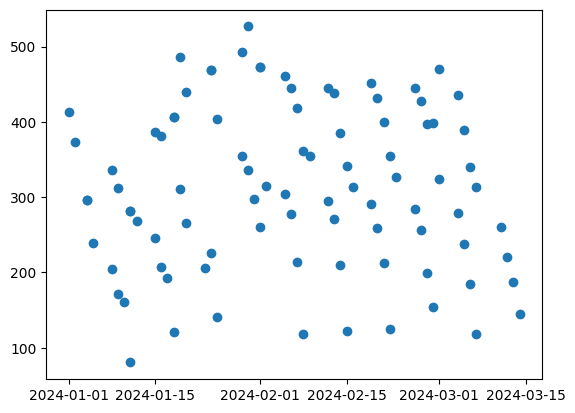

In [7]:
plt.scatter(df['Date'],df['Open'])

In [8]:
filtered_df = df[df['Expiry'] == '2024-03-14']
filtered_df

,Expiry,Date,Open,High,Low,Close,Intraday,Tonight,Index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,dte
0,2024-03-14,2024-03-14,144.60,156.80,2.70,3.40,141.20,0.00,Open,High,Low,Close,Intraday,Gap,0
5,2024-03-14,2024-03-13,187.65,224.55,151.35,151.35,36.30,6.75,21894.65,21952,NaN,NaN,NaN,NaN,1
10,2024-03-14,2024-03-12,220.70,233.15,195.25,198.55,22.15,10.90,21560.65,21865,NaN,NaN,NaN,NaN,2
15,2024-03-14,2024-03-11,260.85,260.85,230.55,230.55,30.30,9.85,21656,21764,NaN,NaN,NaN,NaN,3
20,2024-03-14,2024-03-07,314.10,314.10,247.95,254.45,59.65,-6.40,21791.9,21823,NaN,NaN,NaN,NaN,4
25,2024-03-14,2024-03-06,340.05,348.00,314.45,322.10,17.95,8.00,21705.35,21799,NaN,NaN,NaN,NaN,5
30,2024-03-14,2024-03-05,389.40,389.40,339.35,339.35,50.05,-0.70,21979.95,2200,NaN,NaN,NaN,NaN,6
35,2024-03-14,2024-03-04,435.70,435.70,392.35,393.55,42.15,4.15,22036.1,2204,NaN,NaN,NaN,NaN,7
40,2024-03-14,2024-03-01,470.15,485.70,456.45,456.95,13.20,21.25,21798.55,2194,NaN,NaN,NaN,NaN,8


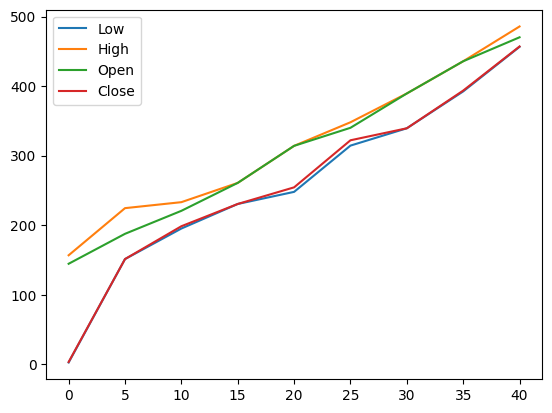

In [9]:
plt.plot(filtered_df['Low'],label='Low')
plt.plot(filtered_df['High'],label='High')
plt.plot(filtered_df['Open'],label='Open')
plt.plot(filtered_df['Close'],label='Close')
plt.legend()

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
previous_date = filtered_df.loc[[15, 20, 25, 30, 35, 40], 'Date'].tolist()
previous_date.reverse()
previous_open = filtered_df.loc[[15, 20, 25, 30, 35, 40], 'Open'].tolist()
previous_open.reverse()
previous_close = filtered_df.loc[[15, 20, 25, 30, 35, 40], 'Close'].tolist()
previous_close.reverse()
previous_low = filtered_df.loc[[15, 20, 25, 30, 35, 40], 'Low'].tolist()
previous_low.reverse()
previous_high = filtered_df.loc[[15, 20, 25, 30, 35, 40], 'High'].tolist()
previous_high.reverse()

In [12]:
series_open = pd.Series(previous_open, index=previous_date)


series_close = pd.Series(previous_close, index=previous_date)


series_low = pd.Series(previous_low, index=previous_date)

series_high = pd.Series(previous_high, index=previous_date)


In [15]:
previous_date

[Timestamp('2024-03-01 00:00:00'),
 Timestamp('2024-03-04 00:00:00'),
 Timestamp('2024-03-05 00:00:00'),
 Timestamp('2024-03-06 00:00:00'),
 Timestamp('2024-03-07 00:00:00'),
 Timestamp('2024-03-11 00:00:00')]

In [16]:
import warnings
warnings.filterwarnings("ignore")

# Fitting SARIMA model
order = (1, 1, 1)  
seasonal_order = (1, 0, 1, 7) 
model = SARIMAX(series_open, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecasting next day's stock price
forecast_open = result.forecast(steps=1)
next_day_open = forecast_open.iloc[0]

print("Forecasted Open price for the next day:", next_day_open)

Forecasted Open price for the next day: 219.61517928348712


In [25]:
model = SARIMAX(series_close, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecasting next day's stock price
forecast_close = result.forecast(steps=1)
next_day_close = forecast_close.iloc[-1]

print("Forecasted Close price for the next day:", next_day_close)

Forecasted Close price for the next day: 187.8713744845757


In [26]:
model = SARIMAX(series_low, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecasting next day's stock price
forecast_low = result.forecast(steps=1)
next_day_low = forecast_low.iloc[-1]

print("Forecasted low price for the next day:", next_day_low)

Forecasted low price for the next day: 214.4681141339076


In [27]:
model = SARIMAX(series_high, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecasting next day's stock price
forecast_high = result.forecast(steps=1)
next_day_high = forecast_high.iloc[-1]

print("Forecasted high price for the next day:", next_day_high)

Forecasted high price for the next day: 216.11609520365204


In [28]:
data={'Open':[next_day_open],'Close':[next_day_close],'High':[next_day_high],'Low':[next_day_low]}


In [33]:
df2=pd.DataFrame(data,index=['Predicted Straddle Prices on Tuesday'])
df2

,Open,Close,High,Low
Predicted Straddle Prices on Tuesday,219.615179,187.871374,216.116095,214.468114
